In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("D:/csvfiles/StockMarket.csv",index_col='Date',parse_dates=True)


In [3]:
data.head(5)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [5]:
data.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
#no null values

<AxesSubplot:xlabel='Date'>

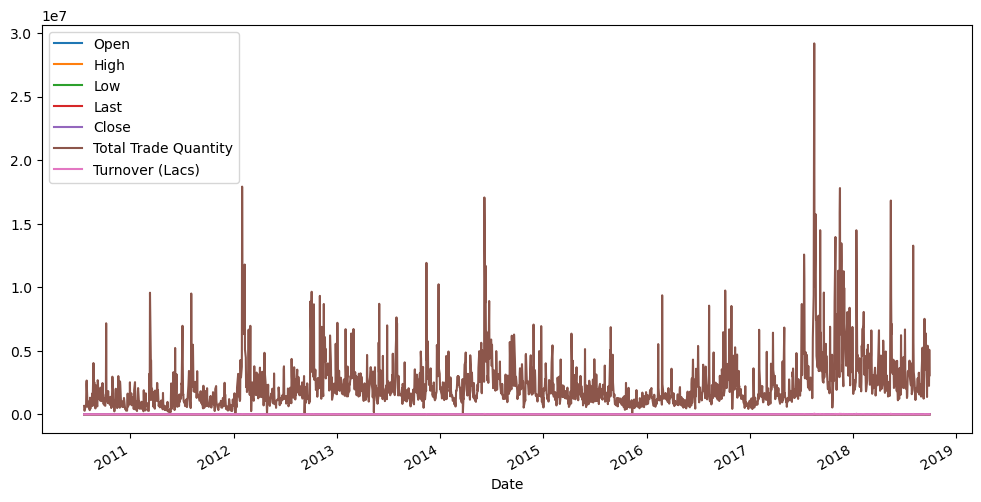

In [7]:
data.plot(figsize=(12,6))

In [8]:
len(data)

2035

In [9]:
train=data.iloc[:2023]
test=data.iloc[2023:]

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
data.head(5)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [13]:
scaler.fit(train)

MinMaxScaler()

In [14]:
train_scaled=scaler.transform(train)
test_scaler=scaler.transform(test)

In [15]:
train_scaled[:10]

array([[0.6202352 , 0.62268754, 0.62156011, 0.62257604, 0.62418301,
        0.10395053, 0.12788156],
       [0.62226277, 0.62614353, 0.6252845 , 0.62380078, 0.62214052,
        0.17300192, 0.21219178],
       [0.64436334, 0.6391543 , 0.63107801, 0.62869973, 0.62622549,
        0.07551262, 0.09353452],
       [0.61719384, 0.62594023, 0.6290089 , 0.63380282, 0.63378268,
        0.07923316, 0.09811652],
       [0.61820762, 0.63590161, 0.62383613, 0.62461727, 0.62234477,
        0.11608013, 0.14290722],
       [0.62408759, 0.6269567 , 0.61224912, 0.62359665, 0.62765523,
        0.18372044, 0.225287  ],
       [0.62793998, 0.62776987, 0.63500931, 0.62706675, 0.62888072,
        0.04536481, 0.05681715],
       [0.63584753, 0.6361049 , 0.63521622, 0.63074097, 0.62949346,
        0.08833825, 0.10995828],
       [0.61658556, 0.63102257, 0.62176702, 0.63441519, 0.63582516,
        0.10741451, 0.13296178],
       [0.57725061, 0.62573694, 0.59300641, 0.62461727, 0.625     ,
        0.21742688, 0.2

In [16]:
train.head(5)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [17]:
n_input=12
from keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
generator=TimeseriesGenerator(train_scaled,train_scaled,length=n_input,batch_size=1)

In [19]:
model=Sequential()  ##model

In [20]:
from keras.layers import LSTM,Dense

In [21]:
model.add(LSTM(100,activation='relu',input_shape=(n_input,7)))

In [22]:
model.add(Dense(1))

In [23]:
model.compile(optimizer='adam',loss='mse')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               43200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,301
Trainable params: 43,301
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(generator,epochs=50)

Epoch 1/50
2011/2011 [==============================] - 15s 6ms/step - loss: 0.0154
Epoch 2/50
2011/2011 [==============================] - 12s 6ms/step - loss: 0.0151
Epoch 3/50
2011/2011 [==============================] - 12s 6ms/step - loss: 0.0151
Epoch 4/50
2011/2011 [==============================] - 11s 5ms/step - loss: 0.0151
Epoch 5/50
2011/2011 [==============================] - 11s 5ms/step - loss: 0.0150
Epoch 6/50
2011/2011 [==============================] - 13s 6ms/step - loss: 0.0150
Epoch 7/50
2011/2011 [==============================] - 10s 5ms/step - loss: 0.0150
Epoch 8/50
2011/2011 [==============================] - 11s 5ms/step - loss: 0.0150
Epoch 9/50
2011/2011 [==============================] - 13s 7ms/step - loss: 0.0149
Epoch 10/50
2011/2011 [==============================] - 12s 6ms/step - loss: 0.0149
Epoch 11/50
2011/2011 [==============================] - 12s 6ms/step - loss: 0.0149
Epoch 12/50
2011/2011 [==============================] - 12s 6ms/step - lo

In [26]:
loss=model.history.history['loss']

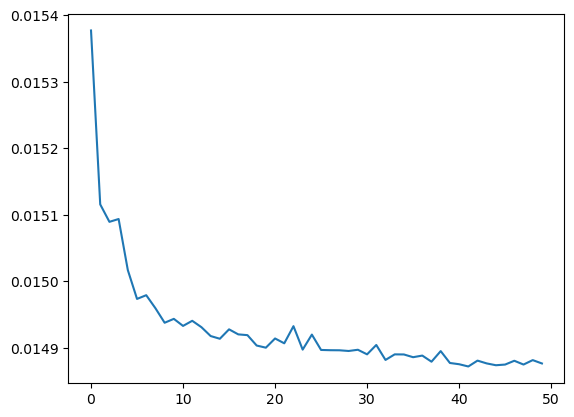

In [27]:
plt.plot(range(len(loss)),loss)

In [28]:
last_train_batch=train_scaled[-12:]

In [29]:
last_train_batch=last_train_batch.reshape((1,12,7))

In [30]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 133ms/step


array([[0.09699924]], dtype=float32)

In [31]:
test_scaler[0]

array([0.14557989, 0.13905265, 0.13987172, 0.13512962, 0.13521242,
       0.02531199, 0.0153733 ])

In [32]:
test_prediction=[]
first_eval_batch=train_scaled[-12:]
current_batch=first_eval_batch.reshape((1,n_input,7))


In [33]:
for i in range(len(test)):
    current_pred=model.predict(current_batch)
    test_prediction.append(current_pred)

1/1 [==============================] - 0s 23ms/step


In [34]:
print(current_batch)

[[[0.13341444 0.14413499 0.13242293 0.14553991 0.14603758 0.13701933
   0.083651  ]
  [0.12530414 0.12441553 0.12849162 0.12390284 0.12479575 0.02105134
   0.01248447]
  [0.11719384 0.12827811 0.11793917 0.13206777 0.13112745 0.05503021
   0.03247261]
  [0.11780211 0.11547062 0.11628388 0.11226781 0.11397059 0.03157042
   0.01822013]
  [0.12489862 0.12034966 0.12290503 0.119208   0.1190768  0.03567132
   0.02081067]
  [0.14132198 0.13478349 0.12725016 0.12655644 0.12377451 0.02673014
   0.01583832]
  [0.13098135 0.13498679 0.13490586 0.13512962 0.13562092 0.02456365
   0.0149264 ]
  [0.12935929 0.12868469 0.13345748 0.12982241 0.12908497 0.01353811
   0.00816863]
  [0.13240065 0.13295385 0.13242293 0.13431313 0.13459967 0.04350926
   0.02625038]
  [0.12895377 0.12807481 0.13056073 0.12676056 0.12806373 0.00987102
   0.00595642]
  [0.12530414 0.12624517 0.13242293 0.1314554  0.13031046 0.01287814
   0.00774543]
  [0.13381995 0.13051433 0.13138837 0.12737293 0.12724673 0.01743556
   0.01

In [35]:
print(test_prediction)

[array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32), array([[0.09699924]], dtype=float32)]


In [36]:
from sklearn.metrics import r2_score

In [37]:
list1=[]
for i in range (12):
    list1.append(current_batch[0][i][6])

In [38]:
print(list1)

[0.08365100423489412, 0.012484466431338933, 0.032472606717680666, 0.018220131217824606, 0.020810674603772852, 0.015838317356461212, 0.014926404446387563, 0.00816862904725292, 0.026250384974058676, 0.005956419141807573, 0.007745426795343125, 0.010468602269570144]


In [39]:
list2=[]
for i in range(12):
    list2.append(test_prediction[i])

In [40]:
list1=np.array(list1).reshape(len(list1),1)

In [41]:
list2=np.array(list2).reshape(len(list2),1)

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [46]:
rsme=sqrt(mean_squared_error(list1,list2))

In [47]:
print(rsme) ##root mean squared error

0.07823968131696533
